In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=200)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [3]:
model.fit(X_train, y_train)# Train the model
y_pred = model.predict(X_test)# Make predictions
accuracy = accuracy_score(y_test, y_pred)# Evaluate the model
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


coefficients: [-0.39349364  0.96246717 -2.3751418  -0.99874814]


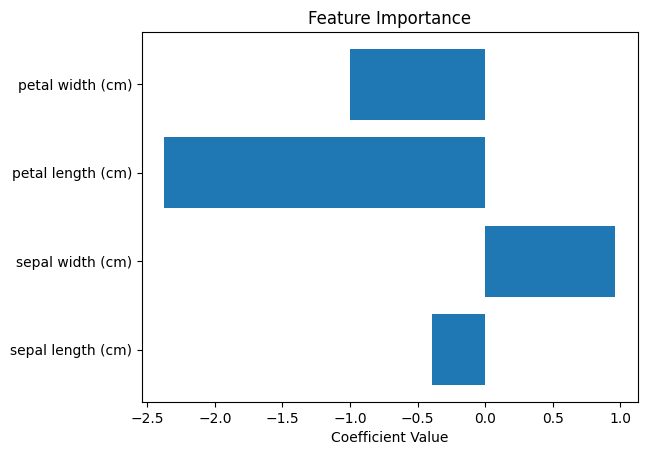

In [ ]:
# you can see the weightage assigned to each feature

# this weightage helps in understanding the importance of each feature in making predictions
# For example, 
# higher absolute values indicate more influence on the prediction
# while values close to zero suggest less influence.

# lets plot the weightage assigned to each feature
import matplotlib.pyplot as plt
features = iris.feature_names
coefficients = model.coef_[0]
print("coefficients:", coefficients)
plt.barh(features, coefficients)
plt.xlabel("Coefficient Value")
plt.title("Feature Importance")
plt.show()


# of weights value is in huge negative or positive then 
# it means that feature is very important for the model

# if the weightage is close to zero then that feature 
# is not important for the model